# <center> Redes Convolucionales </center>

In [ ]:
from tensorflow.keras.datasets import mnist 
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

## Datos de entrenamiento

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Definición del modelo

In [ ]:
input_ = tf.keras.layers.Input(shape=(28,28,1))

x = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),
                           padding='valid',activation='relu',use_bias=True)(input_)

x = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),
                              padding='valid')(x)

x = tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),
                           padding='valid',activation='relu',use_bias=True)(x)

x = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),
                              padding='valid')(x)

x = tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),
                           padding='valid',activation='relu',use_bias=True)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(units=64,activation='relu')(x)
x = tf.keras.layers.Dense(units=10,activation='softmax')(x)

model = tf.keras.Model(input_,x)

## Compilación del modelo

In [ ]:
labels = [0,1,2,3,4,6]
[1,0,0,0,0,0,0]
[0,1,0,0,0,0,0]


[0, 1, 0, 0, 0, 0, 0]

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248  

## Entrenamiento

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 20s 4ms/step - loss: 0.1749 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.0669 - val_sparse_categorical_accuracy: 0.9771
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0536 - sparse_categorical_accuracy: 0.9839 - val_loss: 0.0369 - val_sparse_categorical_accuracy: 0.9882
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0391 - sparse_categorical_accuracy: 0.9883 - val_loss: 0.0399 - val_sparse_categorical_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0307 - sparse_categorical_accuracy: 0.9905 - val_loss: 0.0400 - val_sparse_categorical_accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0267 - sparse_categorical_accuracy: 0.9919 - val_loss: 0.0429 - val_sparse_categorical_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0227 - spar

## Visualización del rendimiento

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0448 - sparse_categorical_accuracy: 0.9904


[0.044798724353313446, 0.9904000163078308]

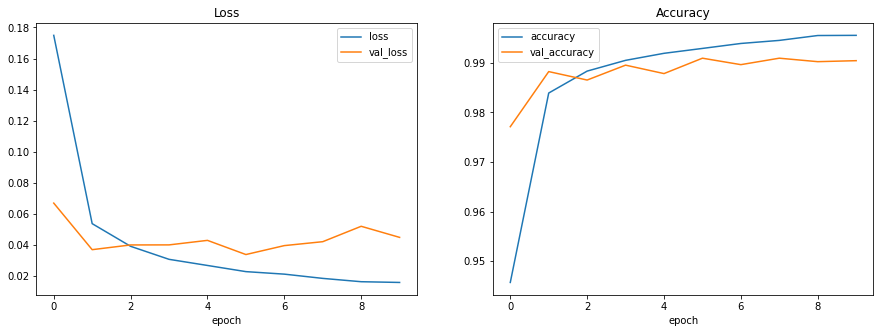

In [ ]:
loss = history.history['loss']
accuracy = history.history['sparse_categorical_accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch');

## Feature Maps

In [ ]:
def plot_featureMaps(X,model,layer_name,n_rows=4,n_cols=4):
    model_B = tf.keras.Model(inputs=model.inputs,outputs=model.get_layer(layer_name).output) #se accede a capas por nombre
    #tf.keras.utils.plot_model(model_B) # modleo ya esta ajustado!
    z = model_B.predict(X)
    print('Shape',z.shape)
    plt.figure(figsize=(3,3))
    if X.shape[-1]==1:
        plt.imshow(X[0,:,:,0], cmap="binary", interpolation="nearest")
    else:
        plt.imshow(X[0])
    tit=str(model.predict(X).round(2))
    plt.title(tit)
    plt.axis('off')
    plt.show()

    f, ax = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(6,6))
    index = 0
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            pb = ax[row,col].imshow(z[0,:,:,index], cmap="jet", interpolation="nearest",vmin=z.min(),vmax=z.max())
            ax[row,col].axis('off')
            ax[row,col].set_title("f_m" + str(index+1), fontsize=12)
            
    plt.tight_layout()
    cbar_ax = f.add_axes([1.01, 0, 0.025, 0.95])
    f.colorbar(pb,shrink=0.25, cax=cbar_ax)    
    #save_fig('fashion_mnist_plot', tight_layout=False)
    plt.show() 
    return

### Capa convolucional 1

Shape (1, 26, 26, 32)


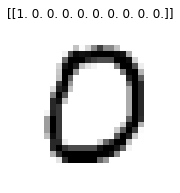

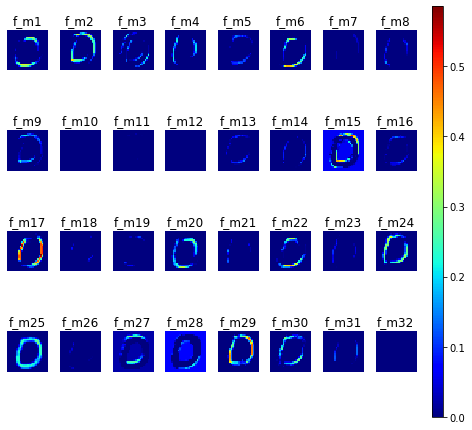

In [ ]:
plot_featureMaps(x_test[10][np.newaxis,...],model,layer_name=model.layers[1].name,n_rows=4,n_cols=8)

### Capa convolucional 2

Shape (1, 11, 11, 32)


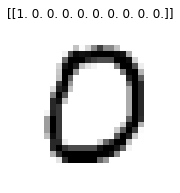

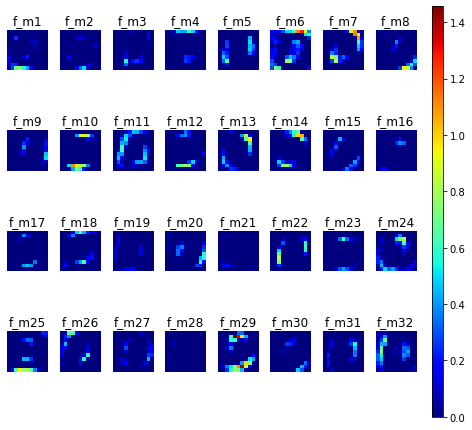

In [ ]:
plot_featureMaps(x_test[10][np.newaxis,...],model,layer_name=model.layers[3].name,n_rows=4,n_cols=8)

### Capa Convolucional 3

Shape (1, 3, 3, 32)


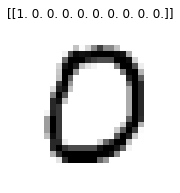

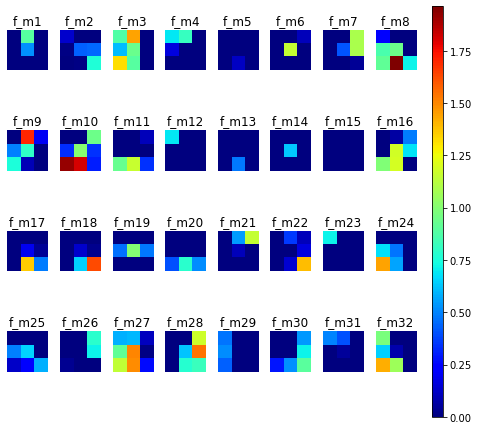

In [ ]:
plot_featureMaps(x_test[10][np.newaxis,...],model,layer_name=model.layers[5].name,n_rows=4,n_cols=8)

## Kernels

In [ ]:
def plot_filters(model,layer_name,n_rows=4,n_cols=4):
    print('Filtros capa '+layer_name)
    print(model.get_layer(layer_name).get_weights()[0].shape)
    z = model.get_layer(layer_name).get_weights()[0]
    f, ax = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(6,6))
    index = 0
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            pb = ax[row,col].imshow(z[:,:,0,index], cmap="jet", interpolation="nearest",vmin=z.min(),vmax=z.max())
            ax[row,col].axis('off')
            ax[row,col].set_title("f" + str(index+1), fontsize=12)
            
    plt.tight_layout()
    cbar_ax = f.add_axes([1.01, 0, 0.025, 0.95])
    f.colorbar(pb,shrink=0.25, cax=cbar_ax)    
    #save_fig('fashion_mnist_plot', tight_layout=False)
    plt.show() 
    return

## Kernel 1

Filtros capa conv2d
(3, 3, 1, 32)


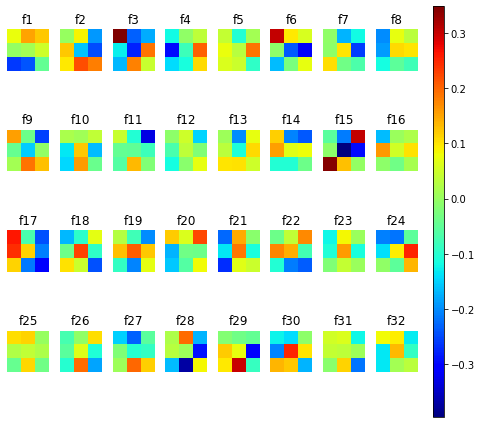

In [ ]:
plot_filters(model,layer_name=model.layers[1].name,n_rows=4,n_cols=8)

## Kernel 2

Filtros capa conv2d_1
(3, 3, 32, 32)


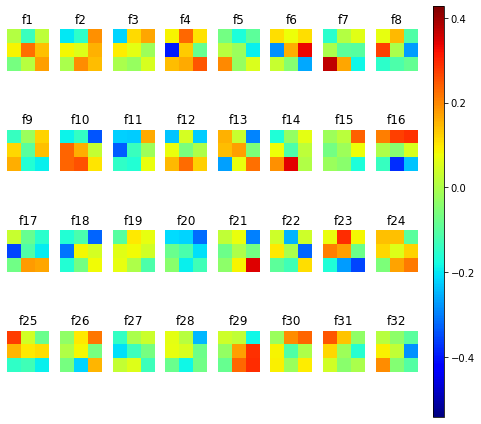

In [ ]:
plot_filters(model,layer_name=model.layers[3].name,n_rows=4,n_cols=8)

## Kernel 3

Filtros capa conv2d_2
(3, 3, 32, 32)


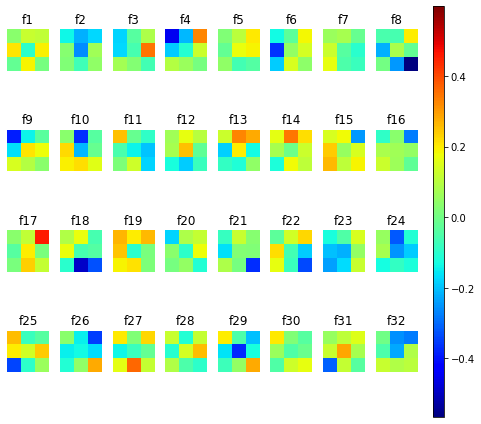

In [ ]:
plot_filters(model,layer_name=model.layers[5].name,n_rows=4,n_cols=8)